# Web Intelligence

## Decision Trees

#### Prof. Claudio Lucchese

# A non linearly separable dataset

In [45]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

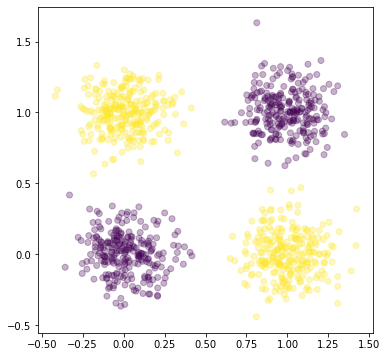

In [46]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# create a (quasi)random dataset
N_SAMPLES = 1000
N_CENTERS = 4
X, y = make_blobs(n_samples=N_SAMPLES, 
                  centers=[[0,0], [0,1], [1,0], [1,1]], 
                  cluster_std=0.15, random_state=4)
y[y==3]=0
y[y==2]=1

# plot
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3)

## What's a decision tree

In [4]:
# on Mac and Linux
import sys, os
!{sys.executable} -m pip install graphviz

In [47]:
# on Windows, uncomment below
!pip install graphviz

In [48]:
# see: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
import graphviz 

f_names = ["Feature 1", "Feature 2"]

c_names = ["Class 0","Class 1"]

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=f_names, class_names=c_names,  
                                filled=True, rounded=True, special_characters=True)  


graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

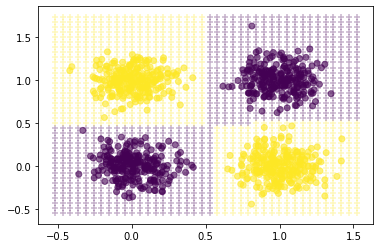

In [9]:
def model_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    zz = [ [xx,yy] for xx in np.linspace(x_min, x_max, 40) 
                   for yy in np.linspace(y_min, y_max, 40) ]
    zz = np.array(zz)
    z_labels = model.predict(zz)

    plt.figure()
    plt.scatter(zz[:,0], zz[:,1], c=z_labels, marker='+', alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.6)

model_decision_boundary(model, X, y)

# Wine dataset

Url: http://archive.ics.uci.edu/ml/datasets/Wine?ref=datanews.io


These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 


The attributes are:
1. Quality (1-3)
1. Alcohol 
1. Malic acid 
1. Ash 
1. Alcalinity of ash 
1. Magnesium 
1. Total phenols 
1. Flavanoids 
1. Nonflavanoid phenols 
1. Proanthocyanins 
1. Color intensity 
1. Hue 
1. OD280/OD315 of diluted wines 
1. Proline 


In [33]:
import numpy as np
import pandas as pd

data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(data_url, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [31]:
# data preparation
dataset = df.astype(float).values
print("dataset shape", dataset.shape)

# get features by removing id and class
# remove id
X = dataset[:,1:]
print("X shape", X.shape)

# get class label
y = dataset[:,0]
print("y shape", y.shape)
print (y)

dataset shape (178, 14)
X shape (178, 13)
y shape (178,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


## Let's build a  tree

In [52]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [62]:
import graphviz 

f_names = ["Alcohol","Malic acid", "Ash", "Alcalinity", "Magnesium", "Phenols",
            "Flavanoids", "Nonflavanoid", "Proanthocyanins", "Color", "Hue", "ODs", "Proline"]

c_names = ["Quality 1","Quality 2","Quality 3"]

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=f_names, class_names=c_names,  
                                filled=True, rounded=True, special_characters=True)  


graph = graphviz.Source(dot_data)
graph

ValueError: Length of feature_names, 13 does not match number of features, 2

## Decision Trees

- Recursive Algorithm
- Select the best split and partition the dataset
- Partitioning Scenarios: k-ary tree, binary tree, categorical, ordinal, numerical
- Recursion ends when a node is pure or no further splitting is possible
  - other constraints can be enforced

## Let's focus on *binary* decision tree for *classification*

## Algorithm Sketch



BuildTree(${\cal D}$):
- BestSplit, BestGain = None
- For each feature $f$
   - For each threshold $t$
     - Let *Gain* be the goodness of the split $(f \leq t)$
     - If Gain>=BestGain:
       - BestGain = Gain
       - BestSplit = $(f \leq t)$
- If Gain is 0 or *other stopping criterion is met*:
   - Let $\mu$ be the best prediction for ${\cal D}$
   - Return $Leaf(\mu)$
- Let $f$ and $t$ be those of BestSplit = $(f \leq t)$
- Left Partition  ${\cal D}_L=\{x \in {\cal D} ~|~ x_f\leq t\}$
- Left Child $L$ = BuildTree(${\cal D}_L$)
- Right Partition ${\cal D}_R=\{x \in {\cal D} ~|~ x_f > t\}$
- Right Child $R$ = BuildTree(${\cal D}_R$)
- Return $Node(L,R)$


It is a greedy algorithm (without backtracking, i.e., decisions are not changed) that maximizes the Gain at every step.

## Driving Factor

We let the design of our algorithm be driven by the quality measure adopted.

For classification, we adopt **error** $E$, that is the fraction of misclassified instances.

## Leaf Node

- Given a dataset ${\cal D}$ what is the best prediction we can have?

$$\mu = \arg\min\limits_{\mu} Error({\cal D}, \mu)= \arg\min\limits_{\mu} \frac{1}{|{\cal D}|} \sum\limits_{(x,y) \in {\cal D}} E(y, \mu)$$
   - where $ E(y, \mu)$ is 0 if $\mu=y$ and 1 otherwise

- for the classification task, it holds that $\mu$ must be the most frequent label in ${\cal D}$

- if we denote with $p_i$ the frequency of label $l_i$ in ${\cal D}$, we can write that total error 
on the dataset is:
$$
Error({\cal D}) = 1 - \max_i p_i
$$
  - Maximum: $(1 - 1/m)$, where $m$ is the number of classes, when records are equally distributed among all classes, implying least interesting information
  - Minimum: (0.0) when all records belong to one class, implying most interesting information

- Hereinafter we denote with $Error({\cal D})$ the error of the best prediction $\mu$ for dataset ${\cal D}$.


## Internal Node

- Given the pair $f \leq t$, we must determine the quality of this split.

- In general, assuming $Error$ is an average measure, we denote the gain of a split as the error reduction with respect to not splitting the node.

$$
Gain(f,t~|~{\cal D}) = Error({\cal D}) - \left(\frac{|{\cal D}_L|}{|{\cal D}|} Error({\cal D}_L) + \frac{|{\cal D}_R|}{|{\cal D}|} Error({\cal D}_R) \right)
$$

- We would like Gain>0, note that Gain cannot decrease.


## Let's make an example

| ${\cal D}$ | |
|-|-|
|Class 0 | Class 1 |
| 400    |  400    |

| Splitting A | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| vs. | Splitting B | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|-|-|-|-|-|-|-|-|-|
| ${\cal D}_L$ | | ${\cal D}_R$ | |     | ${\cal D}_L$ | | ${\cal D}_R$ | |
|Class 0 |  Label 1 |Class 0 | Class 1 | |Class 0 | Class 1 |Class 0 | Class 1 |
| 300    |  100    | 100    |  300    | | 200    |  400    | 200    |  0    |
| $p_0=3/4$ | ${p_1=1/4}$ | $p_0=1/4$ | $p_1=3/4$ | | $p_0= 1/3$ | $p_1= 2/3$ | $p_0= 1$ | $p_1= 0$ |




- Suppose $|{\cal D}|$ has 400 instances in class 0 and 400 instances in class 1, denoted with ${\cal D}=(400,400)$
   - $Error({\cal D}) = 0.5$
   

- Suppose Splitting $A=(f_1, t_1)$ produces ${\cal D}_L=(300,100)$ and ${\cal D}_R=(100,300)$:
   - $Gain(A|~{\cal D}) = 0.5 - 400/800 * (1- 3/4) - 400/800 *(1-3/4) = 0.25$
   
   
- Suppose Splitting $B=(f_2, t_2)$ produces ${\cal D}_L=(200,400)$ and ${\cal D}_R=(200,000)$:
   - $Gain(B|~{\cal D}) = 0.5 - 600/800 * (1- 2/3) - 200/800 *(1-1) = 0.25$
   
   
- The two splits are equally good, one of them is picked at random



- Indeed, we would like to consistently prefer $B$ as it produces one *pure* child, i.e., a set of instances with perfect prediction that needs not to be processed recursively.

## Information Gain
### ( ID3 - Iterative Dichotomiser )


The error of a dataset is measured as the entropy of its labels distributions

$$
Error({\cal D}) = Info({\cal D}) = -\sum\limits_i p_i\log_2 ( p_i )
$$
   - where $p_i$ is the probability/frequency of label $i$
   - This is indeed the **entropy**, i.e., a measure of the randomness of the labels
   - Maximum: $\log m$, where $m$ is the number of classes, when records are equally distributed among all classes implying least information
   - Minimum: 0.0 when all records belong to one class, implying most information (assume $0\log 0=0$)



## Let's make an example

- Suppose $|{\cal D}|$ has 400 instances in class 0 and 400 instances in class 1, denote with ${\cal D}=(400,400)$
   - $Error({\cal D}) = - 1/2 \log(1/2) - 1/2 \log(1/2) = \log(2) = 1$
   

- Suppose Splitting $A=(f_1, t_1)$ produces ${\cal D}_L=(300,100)$ and ${\cal D}_R=(100,300)$:
   - $Gain(A|~{\cal D}) = 1 - 400/800 * ( - 3/4 \log(3/4) - 1/4 \log(1/4)) - 400/800 *( - 1/4 \log(1/4) - 3/4 \log(3/4)) \approx 0.19$
   
   
- Suppose Splitting $B=(f_2, t_2)$ produces ${\cal D}_L=(200,400)$ and ${\cal D}_R=(200,000)$:
   - $Gain(B|~{\cal D}) = 1 - 600/800 * (- 1/3 \log(1/3) -2/3 \log(2/3)) - 200/800 *(- 1 \log(1) -0 \log(0)) \approx 0.31$
   
   
- Largest Gain is for split B!

## Gain Ratio

### ( C4.5 Algorithm )

- For k-ary decision trees (instead of binary), Information Gain favors splits with several small partitions
  - they are more likely to be pure
  

- Gain Ration normalizes the Information Gain by the SplitInfo of a k-way splitting:
$$
SplitInfo({\cal D}) =  -\sum\limits_{i=1}^k \frac{|{\cal D}_i|}{|{\cal D}|} \log \left(\frac{|{\cal D}_i|}{|{\cal D}|}\right) 
$$
  - this is analogous to the information gain, but related to the partitioning instead of the labels
  - large values of $k$ (complex partitionings) receive a large score
  
  
  
- The Gain Ratio is formalized as:
$$
Error({\cal D}) = GainRatio({\cal D}) = \frac{Info({\cal D})}{SplitInfo({\cal D})}
$$

## GINI Index

### ( CART - Classification and Regression Trees)

GINI is a measure of statistical dispersion developed by the Italian statistician and sociologist Corrado Gini (the index was published in 1912).

$$
Error({\cal D}) = Gini({\cal D}) = 1-\sum\limits_i p_i^2
$$

  - Maximum: $(1 - 1/m)$ when records are equally distributed among all classes, implying least interesting information
  - Minimum: (0.0) when all records belong to one class, implying most interesting information

## Let's make an example

- Suppose $|{\cal D}|$ has 400 instances in class 0 and 400 instances in class 1, denote with ${\cal D}=(400,400)$
   - $Error({\cal D}) = 1 - (1/2)^2 - (1/2)^2 = 0.5$
   

- Suppose Splitting $A=(f_1, t_1)$ produces ${\cal D}_L=(300,100)$ and ${\cal D}_R=(100,300)$:
   - $Gain(A|~{\cal D}) = 0.5 - 400/800 * ( 1 - (3/4)^2 - (1/4)^2) - 400/800 *(1- (1/4)^2 - (3/4)^2) = 0.125$
   
   
- Suppose Splitting $B=(f_2, t_2)$ produces ${\cal D}_L=(200,400)$ and ${\cal D}_R=(200,000)$:
   - $Gain(B|~{\cal D}) =  0.5 - 600/800 * ( 1 - (1/3)^2 - (2/3)^2) - 200/800 *(1- (1)^2 - (0)^2) \approx 0.167$
   
   
- Largest Gain is for split B!

## Exercise: Compare gini vs. information gain on a train/test split



See documentation for the `criterion` parameter:
  - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

## Plot decision surfaces on wine

In [14]:
import numpy as np
import pandas as pd

data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(data_url, header=None)

# data preparation
dataset = df.astype(float).values
print("dataset shape", dataset.shape)

# get features by removing id and class
# remove id
X = dataset[:,1:]
print("X shape", X.shape)

# get class label
y = dataset[:,0]
print("y shape", y.shape)
print (y)

dataset shape (178, 14)
X shape (178, 13)
y shape (178,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Test Accuracy: 0.9491525423728814


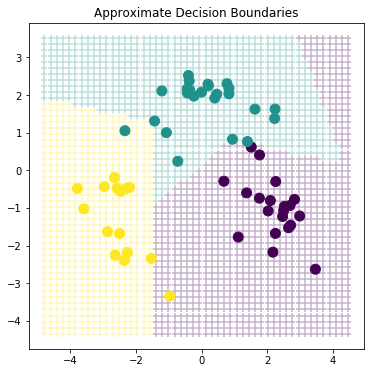

In [16]:
# Decision boundary ploy
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# needed for PCA
scaler = StandardScaler()
scaler.fit(X_train)

# training a decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini') # try gini vs. entropy
dt.fit( scaler.transform(X_train),
        y_train)

# make it 2d
pca = PCA(n_components=2)
pca.fit( scaler.transform(X_train) )

# create projection grid starting form test points
X_2d = pca.transform( scaler.transform(X_test) )
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
zz = [ [xx,yy] for xx in np.linspace(x_min, x_max, 50) 
               for yy in np.linspace(y_min, y_max, 50) ]
zz = np.array(zz)
Z = dt.predict(pca.inverse_transform(zz))

# Put the result into a color plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(zz[:,0], zz[:,1], c=Z, marker='+', alpha=0.3)

# Plot also the test points
ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y_test, s=100)

ax.set_title("Approximate Decision Boundaries")

# compute Accuracy

from sklearn.metrics import accuracy_score
y_pred = dt.predict(scaler.transform(X_test))

print ("Test Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred) )

- Note: as in the previous lesson, we are using PCA to map 2-D points of the grid into N-D points of the original dataset. PCA introduces some degree of approximation in this process. It would be more accurate to create a N-D grid and then project it into a 2-D space for plotting, but generating a N-D grid is generally too expensive.

# Decision tree on multiple classes

Try a different number of clusters and leaves

Train Accuracy: 0.508955223880597  - Test Accuracy: 0.47878787878787876


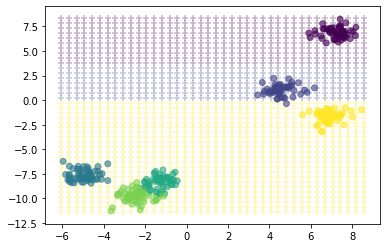

In [17]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree

# create a (quasi)random dataset
N_SAMPLES = 1000
N_CENTERS = 6
X, y = make_blobs(n_samples=N_SAMPLES, 
                  centers=N_CENTERS, 
                  cluster_std=0.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# train and predict
dt = tree.DecisionTreeClassifier(max_leaf_nodes=3)
dt.fit(X_train,y_train)

# compute Accuracy
train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
print ("Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)

model_decision_boundary(dt, X_test, y_test)

## Stopping Criteria: max leaf nodes

The number of leaves affects the model expressiveness.

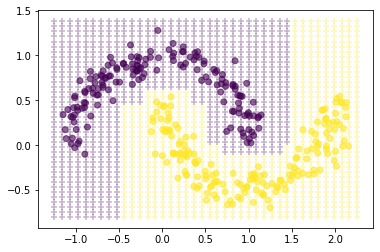

In [18]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn import tree

X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# train and predict
dt = tree.DecisionTreeClassifier(max_leaf_nodes=30)
dt.fit(X_train,y_train)

model_decision_boundary(dt, X_test, y_test)


In [19]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for max_leaves in range(2,20):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    print ("Leaves:", max_leaves, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)


Leaves: 2  - Train Accuracy: 0.8313432835820895  - Test Accuracy: 0.8212121212121212
Leaves: 3  - Train Accuracy: 0.9074626865671642  - Test Accuracy: 0.9212121212121213
Leaves: 4  - Train Accuracy: 0.9074626865671642  - Test Accuracy: 0.9212121212121213
Leaves: 5  - Train Accuracy: 0.9253731343283582  - Test Accuracy: 0.8939393939393939
Leaves: 6  - Train Accuracy: 0.9925373134328358  - Test Accuracy: 0.9878787878787879
Leaves: 7  - Train Accuracy: 0.9970149253731343  - Test Accuracy: 0.9878787878787879
Leaves: 8  - Train Accuracy: 0.9970149253731343  - Test Accuracy: 0.9878787878787879
Leaves: 9  - Train Accuracy: 0.9985074626865672  - Test Accuracy: 0.9878787878787879
Leaves: 10  - Train Accuracy: 0.9985074626865672  - Test Accuracy: 0.9878787878787879
Leaves: 11  - Train Accuracy: 1.0  - Test Accuracy: 0.9878787878787879
Leaves: 12  - Train Accuracy: 1.0  - Test Accuracy: 0.9878787878787879
Leaves: 13  - Train Accuracy: 1.0  - Test Accuracy: 0.9878787878787879
Leaves: 14  - Train A

## Stopping Criteria: maximum depth

The number of leaves affects the model expressiveness.

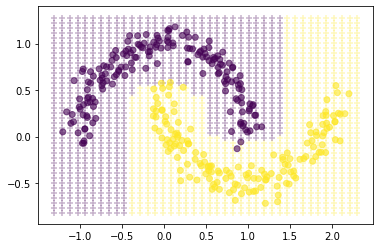

In [20]:
from sklearn import tree
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# train and predict
dt = tree.DecisionTreeClassifier(max_depth=10)
dt.fit(X_train,y_train)

model_decision_boundary(dt, X_test, y_test)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for max_depth in range(1,20):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    print ("Depth:", max_depth, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)


Depth: 1  - Train Accuracy: 0.8522388059701492  - Test Accuracy: 0.793939393939394
Depth: 2  - Train Accuracy: 0.9194029850746268  - Test Accuracy: 0.9121212121212121
Depth: 3  - Train Accuracy: 0.9194029850746268  - Test Accuracy: 0.9121212121212121
Depth: 4  - Train Accuracy: 0.9208955223880597  - Test Accuracy: 0.9090909090909091
Depth: 5  - Train Accuracy: 0.9895522388059701  - Test Accuracy: 0.9787878787878788
Depth: 6  - Train Accuracy: 0.9970149253731343  - Test Accuracy: 0.990909090909091
Depth: 7  - Train Accuracy: 1.0  - Test Accuracy: 0.996969696969697
Depth: 8  - Train Accuracy: 1.0  - Test Accuracy: 0.996969696969697
Depth: 9  - Train Accuracy: 1.0  - Test Accuracy: 0.996969696969697
Depth: 10  - Train Accuracy: 1.0  - Test Accuracy: 0.996969696969697
Depth: 11  - Train Accuracy: 1.0  - Test Accuracy: 0.996969696969697
Depth: 12  - Train Accuracy: 1.0  - Test Accuracy: 0.996969696969697
Depth: 13  - Train Accuracy: 1.0  - Test Accuracy: 0.996969696969697
Depth: 14  - Train

## Tuning of the tree

The power of the tree can be tuned with the following constraints:

- **max_depth**: The maximum depth of the tree. 

- **min_samples_split**: The minimum number of samples required to split an internal node

- **min_samples_leaf**: The minimum number of samples required to be at a leaf node.

- **max_leaf_nodes**: The maximum number of trees.

- **min_impurity_decrease**: The minimum gain for allowing a split.

- **min_impurity_split**: The minim error for allowing a split.

In conjunction with the above constraints most implementations implement a smarter growing strategy. 
Indeed, if we are limited in the number of nodes, then growing order makes a difference.
In this case, it is useful to evaluate the gain provided by splitting all of the tree leaves, and 
then split the leaf the provides the maximum gain.

## Algorithm Sketch 

Non-recursive, best split first


BuildTree(${\cal D}$):
- $Tree = \emptyset$
- $Queue$ = (0,{\cal D})
- **while** $Queue$ is not empty and *no other stopping criterion is met*:
   - $(gain, {\cal D}^*)$ = $Queue$.pop_max()
   - Let $(f,t)$ be the best split of ${\cal D}^*$
   - Add node $(f,t)$ to $Tree$ at the leaf correspinding to ${\cal D}^*$
   - Left Partition  ${\cal D}_L=\{x \in {\cal D} ~|~ x_f\leq t\}$
     - Find best split $(f,t)$ of ${\cal D}_L$
     - Let *gain* be the goodness of $(f \leq t)$ in  ${\cal D}_L$
     - $Queue$.push( $(gain, {\cal D}_L)$ )
   - Right Partition  ${\cal D}_R=\{x \in {\cal D} ~|~ x_f > t\}$
     - Find best split $(f,t)$ of ${\cal D}_R$
     - Let *gain* be the goodness of $(f \leq t)$ in  ${\cal D}_R$
     - $Queue$.push( $(gain, {\cal D}_R)$ )
- **return** $Tree$

## Let's try with a mode complex dataset

In [22]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [23]:
print (data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [24]:
X = data.data
y = data.target

print (X.shape)
print (y.shape)
print (data.target_names)

(569, 30)
(569,)
['malignant' 'benign']


In [25]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

for max_leaves in range(2,20):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    print ("Leaves:", max_leaves, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)

Leaves: 2  - Train Accuracy: 0.9208791208791208  - Test Accuracy: 0.8947368421052632
Leaves: 3  - Train Accuracy: 0.9230769230769231  - Test Accuracy: 0.9122807017543859
Leaves: 4  - Train Accuracy: 0.9296703296703297  - Test Accuracy: 0.9298245614035088
Leaves: 5  - Train Accuracy: 0.9582417582417583  - Test Accuracy: 0.9473684210526315
Leaves: 6  - Train Accuracy: 0.967032967032967  - Test Accuracy: 0.956140350877193
Leaves: 7  - Train Accuracy: 0.9802197802197802  - Test Accuracy: 0.9473684210526315
Leaves: 8  - Train Accuracy: 0.9846153846153847  - Test Accuracy: 0.9473684210526315
Leaves: 9  - Train Accuracy: 0.989010989010989  - Test Accuracy: 0.9473684210526315
Leaves: 10  - Train Accuracy: 0.9912087912087912  - Test Accuracy: 0.9473684210526315
Leaves: 11  - Train Accuracy: 0.9934065934065934  - Test Accuracy: 0.9298245614035088
Leaves: 12  - Train Accuracy: 0.9956043956043956  - Test Accuracy: 0.9385964912280702
Leaves: 13  - Train Accuracy: 0.9956043956043956  - Test Accuracy

## Never touch the test set !!!!

We should never make decision on the basis of the test set!

Test set contains *future* instances not available at training time.

## Validation Set

Never touch the test set!

Train can be further split to simulate an unseen test set on which we can tune/validate the algorithm's hyper-parameters.

A split in 60/20/20 into train/validation/test is typical.

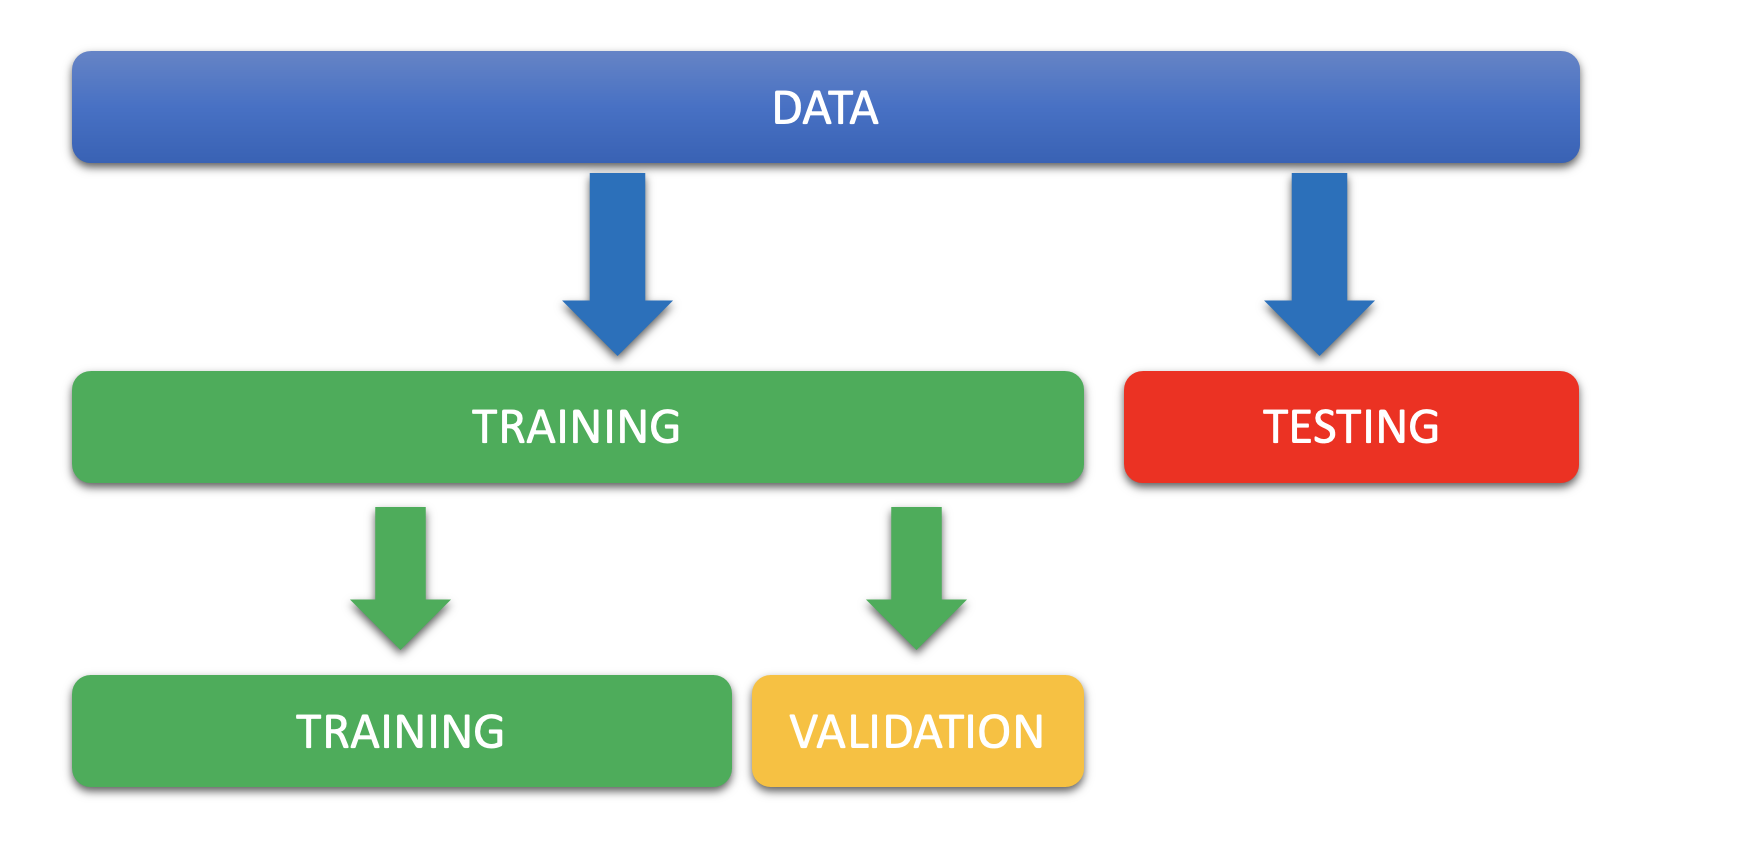

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

# this is a 60/20/20 split
X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_80, y_train_80, test_size=0.25, random_state=42)

accuracies = []

for max_leaves in range(2,20):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
    print ("Leaves: {:2d} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f}".format(
        max_leaves,  train_acc, valid_acc) )
    
    accuracies += [ [valid_acc, max_leaves] ]

best_accuracy, best_max_leaves = max(accuracies)
print ( "Best Max Leaves", best_max_leaves )

# here we are using both training and validation,
# to exploit the most data
dt = tree.DecisionTreeClassifier(max_leaf_nodes=best_max_leaves)
dt.fit(X_train_80,y_train_80)

test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
print ("Test Accuracy: {:.3f}".format(test_acc) )

Leaves:  2 - Train Accuracy: 0.924 - Validation Accuracy: 0.912
Leaves:  3 - Train Accuracy: 0.962 - Validation Accuracy: 0.912
Leaves:  4 - Train Accuracy: 0.968 - Validation Accuracy: 0.912
Leaves:  5 - Train Accuracy: 0.974 - Validation Accuracy: 0.930
Leaves:  6 - Train Accuracy: 0.977 - Validation Accuracy: 0.930
Leaves:  7 - Train Accuracy: 0.979 - Validation Accuracy: 0.921
Leaves:  8 - Train Accuracy: 0.982 - Validation Accuracy: 0.921
Leaves:  9 - Train Accuracy: 0.985 - Validation Accuracy: 0.921
Leaves: 10 - Train Accuracy: 0.985 - Validation Accuracy: 0.930
Leaves: 11 - Train Accuracy: 0.994 - Validation Accuracy: 0.921
Leaves: 12 - Train Accuracy: 1.000 - Validation Accuracy: 0.939
Leaves: 13 - Train Accuracy: 1.000 - Validation Accuracy: 0.939
Leaves: 14 - Train Accuracy: 1.000 - Validation Accuracy: 0.939
Leaves: 15 - Train Accuracy: 1.000 - Validation Accuracy: 0.930
Leaves: 16 - Train Accuracy: 1.000 - Validation Accuracy: 0.930
Leaves: 17 - Train Accuracy: 1.000 - Val

## References

- **Data Mining Concepts and Techniques Third Edition**. Jiawei Han, Micheline Kamber Jian Pei.  Morgan Kaufmann/Elsevier. Third Edition. 2012.
  - Chapter 8.2: Decision Tree Induction up to 8.2.3 (not included)
  